In [2]:
import pandas as pd
import math
import matplotlib
import numpy as np
from numpy import random
from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline

(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

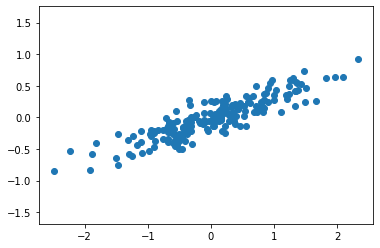

In [3]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2,2),rng.randn(2,200)).T 


plt.scatter(X[:,0], X[:,1])
plt.axis('equal')

In [4]:
from sklearn.decomposition import PCA
mypca = PCA(n_components =2)
mypca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [5]:
print(mypca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [6]:
print(mypca.explained_variance_)
# 벡터 방향으로의 분산

[0.7625315 0.0184779]


(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

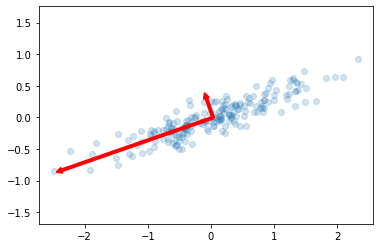

In [7]:
def draw_vector(v0, v1, ax=None):
  ax = ax or plt.gca()
  arrowprops = dict(color='red',
                    arrowstyle='simple',
                    linewidth=2,
                    shrinkA=0, shrinkB=0 )
  ax.annotate('', v1, v0, arrowprops=arrowprops)


# data plotting
plt.scatter(X[:, 0], X[:,1], alpha=0.2)
for length, vector in zip(mypca.explained_variance_, mypca.components_):
  v = vector * 3 * np.sqrt(length)
  draw_vector(mypca.mean_, mypca.mean_ + v)
plt.axis('equal')

In [8]:
# 차원 축소

dimpca = PCA(n_components=1)
dimpca.fit(X)
X_pca = dimpca.transform(X)
print('original shape: ', X.shape)
print('transformed shape: ', X_pca.shape)

original shape:  (200, 2)
transformed shape:  (200, 1)


(-2.731158226766438,
 2.6099018832593326,
 -0.9672765706389318,
 1.006064230853995)

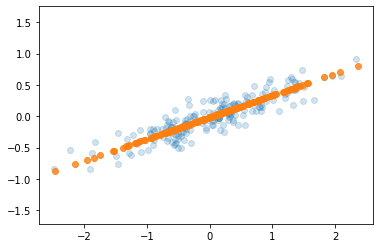

In [9]:
# 역변환
X_new = dimpca.inverse_transform(X_pca)
plt.scatter(X[:,0], X[:,1], alpha=0.2)
plt.scatter(X_new[:,0], X_new[:,1], alpha=0.8)
plt.axis('equal')

In [10]:
# 고유 얼굴 성분 찾기
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [11]:
# 얼굴 특징 추출
from sklearn.decomposition import PCA
face_pca = PCA(150)
face_pca.fit(faces.data)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

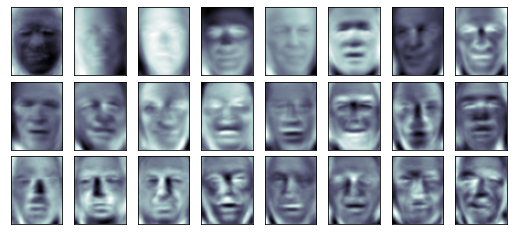

In [12]:
fig, axes = plt.subplots(3,8, figsize=(9,4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
  ax.imshow(face_pca.components_[i].reshape(62,47), cmap='bone')